# Function

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [115]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [116]:
# Plot diagrams of quantity

def plot_count(df, col, rot = 0):
    size_values = df[col].value_counts()
    colors = plt.cm.tab20(np.linspace(0, 1, len(size_values)))
    size_values.plot(kind='bar',color=colors, title=f"Number of {col}")
    plt.xlabel(f"{col.capitalize()}")
    plt.ylabel("Count")
    plt.xticks(rotation=rot)
    plt.tight_layout()
    plt.show()

In [117]:
# Plot average price with error bar

def plot_average_price_with_error_bars(df, group_col, figsize=(10, 4), palette='tab10', ci_multiplier=1.96, title = None):
    grouped_data = df.groupby(group_col).agg(
        Average_Price=('price', 'mean'),
        Standard_Deviation=('price', 'std'),
        Sample_Size=('price', 'count')
    ).reset_index()

    grouped_data['Standard_Error'] = grouped_data['Standard_Deviation'] / np.sqrt(grouped_data['Sample_Size'])
    grouped_data['Error_Margin'] = grouped_data['Standard_Error'] * ci_multiplier

    xerr_values = grouped_data['Error_Margin'].values

    plt.figure(figsize=figsize)
    ax = sns.barplot(
        x='Average_Price',
        y=group_col,
        data=grouped_data,
        palette=palette,
        hue=group_col,
    )

    for bar, err in zip(ax.patches, xerr_values):
        bar_center = bar.get_y() + bar.get_height() / 2 
        plt.errorbar(bar.get_width(), bar_center, xerr=err, fmt='none', ecolor='black', capsize=5)

    plt.title(f'Average Price by {group_col.capitalize()} with Error Margins', fontsize=14)
    plt.xlabel(f'Average Price', fontsize=12)
    plt.ylabel(group_col.capitalize(), fontsize=12)

    plt.tight_layout()
    plt.show()

In [118]:
# Function to visualize boxplot and scatter plot to detect outliar

def detect_outliar(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title("Box Plot")
    axes[0].set_xlabel(f"{col.capitalize()}")
    axes[0].axvline(lower_bound, color='blue')
    axes[0].axvline(upper_bound, color='blue')

    sns.scatterplot(x=df['price'], y=df[col], ax=axes[1])
    axes[1].set_title("Scatter Plot")
    axes[1].set_xlabel("Price")
    axes[1].set_ylabel(f"{col.capitalize()}")

    fig.suptitle(f"Outlier Visualization {col}")

    plt.tight_layout()
    plt.show()

In [119]:
def plot_price_distribution_by_color(df, color, ax):

    filtered_data = df[df['color'].str.lower() == color.lower()]

    background_color = '#f0f0f0'
    ax.set_facecolor(background_color)

    histogram_color = color.lower()
    edge_color = 'black'

    sns.histplot(filtered_data['price'], kde=True, color=histogram_color, ax=ax, edgecolor=edge_color)

    ax.set_title(f'Distribution of Price for {color.capitalize()} Products', fontsize=12, fontweight='bold')
    ax.set_xlabel('Price', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Dataset

In [120]:
import pandas as pd

df = pd.read_json('final_data.json')

In [121]:
df.head()

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,Women's High Waist A-Line Pleated Mini Skirt S...,B08DHX2TKD,Zhanchtong,Pink,Small,21.98,Women,Imported,1445.0,4.0,...,0,0,0,0,1,0,0,0,0,0
1,PRETTYGARDEN Women's Cross Neck Summer Sleevel...,B09TP9RGS3,Prettygarden,Pink,Medium,34.94,Women,Imported,1715.0,4.2,...,0,0,1,0,0,0,0,0,0,0
2,PRETTYGARDEN Women's Basic Bodycon Midi Dress ...,B094JD8NJJ,Prettygarden,White,Small,36.99,Women,Imported,2382.0,4.4,...,0,0,1,0,0,0,0,0,0,0
3,"Champion Men's Zip-up Hoodie, Powerblend, Zip-...",B08M89QDJY,Champion,Black,XX-Large,35.00,Men,Imported,14981.0,4.6,...,0,0,0,0,1,0,0,0,0,0
4,IDEALSANXUN Womens Plaid Wool Skirts Elastic W...,B0BG72S6QZ,Idealsanxun,Grey,X-Large,36.98,Women,Imported,9575.0,4.3,...,0,0,0,0,1,0,0,0,0,0


In [122]:
# Descriptive statistics
df.describe()

,price,rating,star,Polyester,Spandex,Nylon,Cotton,Rayon,Acrylic,Modal,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
count,19606.000000,19066.000000,19066.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,...,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000
mean,29.550884,8841.852617,4.330033,0.556447,0.043034,0.101751,0.214627,0.062270,0.003405,0.011564,...,0.049771,0.087149,0.595003,0.038909,0.094493,0.081795,0.040847,0.043090,0.024783,0.087659
std,13.491342,20512.722635,0.254928,0.419996,0.062167,0.269883,0.347451,0.214497,0.050297,0.096374,...,0.217476,0.282061,0.490904,0.193382,0.292520,0.274059,0.197940,0.203065,0.155468,0.282806
min,4.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.990000,180.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.690000,1310.000000,4.300000,0.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.590000,7087.000000,4.500000,0.970000,0.050000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,385.990000,176989.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
len(df)

19610

# Handle Missing value

In [124]:
# Analyse missing data
draw_missing_data_table(df)

,Total,Percent
color,3444,0.175625
rating,544,0.027741
star,544,0.027741
size,153,0.007802
price,4,0.000204
name,0,0.000000
Pull on,0,0.000000
Silk,0,0.000000
Machine Wash,0,0.000000
Hand Wash,0,0.000000


In [125]:
# Handle missing value for color
import numpy as np

color_probabilities = df['color'].value_counts(normalize=True, dropna=True)
nan_indices = df['color'][df['color'].isna()].index
df.loc[nan_indices, 'color'] = np.random.choice(color_probabilities.index, size=len(nan_indices), p=color_probabilities.values)

In [126]:
# Drop missing value in the other features
df = df.dropna()

In [127]:
draw_missing_data_table(df)

,Total,Percent
name,0,0.0
Tumble Dry,0,0.0
Leather,0,0.0
Linen,0,0.0
Silk,0,0.0
Machine Wash,0,0.0
Hand Wash,0,0.0
Not Bleach,0,0.0
Pull on,0,0.0
Wool,0,0.0


In [128]:
len(df)

18922

# Detect outliers

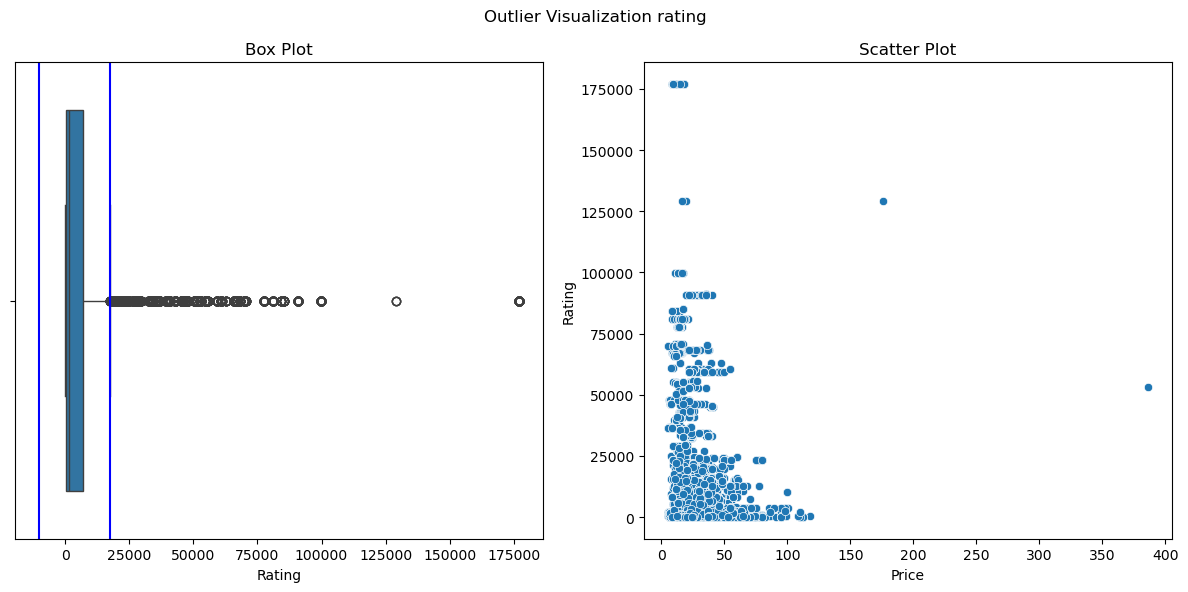

In [129]:
detect_outliar(df,'rating')

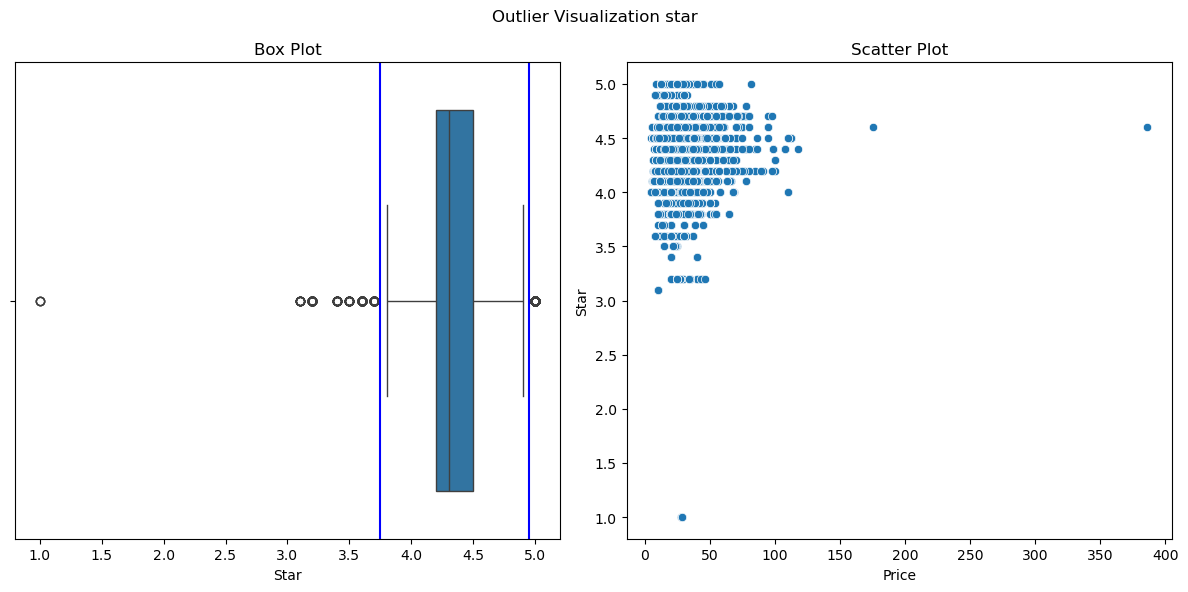

In [130]:
detect_outliar(df,'star')

We use box plots and scatter plots for numerical features to display and identify outliers. Furthermore, we think that values falling outside the range `[Q1 - 1.5 × IQR, Q3 + 1.5 × IQR]`, where `Q1` is the first quartile, `Q3` is the third quartile, and `IQR` is the interquartile range (`Q3 - Q1`), are probably outliers.

Note that the green vertical lines in the box plots represent IQR lines. In conclusion, we eliminate rows with rating >75000 and star <3.5 based on these presumptions. 

In [131]:
df = df[(df['rating'] <= 75000) & (df['star'] >= 3.5)]

# EDA

In [132]:
df.head()

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,Women's High Waist A-Line Pleated Mini Skirt S...,B08DHX2TKD,Zhanchtong,Pink,Small,21.98,Women,Imported,1445.0,4.0,...,0,0,0,0,1,0,0,0,0,0
1,PRETTYGARDEN Women's Cross Neck Summer Sleevel...,B09TP9RGS3,Prettygarden,Pink,Medium,34.94,Women,Imported,1715.0,4.2,...,0,0,1,0,0,0,0,0,0,0
2,PRETTYGARDEN Women's Basic Bodycon Midi Dress ...,B094JD8NJJ,Prettygarden,White,Small,36.99,Women,Imported,2382.0,4.4,...,0,0,1,0,0,0,0,0,0,0
3,"Champion Men's Zip-up Hoodie, Powerblend, Zip-...",B08M89QDJY,Champion,Black,XX-Large,35.00,Men,Imported,14981.0,4.6,...,0,0,0,0,1,0,0,0,0,0
4,IDEALSANXUN Womens Plaid Wool Skirts Elastic W...,B0BG72S6QZ,Idealsanxun,Grey,X-Large,36.98,Women,Imported,9575.0,4.3,...,0,0,0,0,1,0,0,0,0,0


In [133]:
df.columns

Index(['name', 'asin', 'brand', 'color', 'size', 'price', 'department',
       'origin', 'rating', 'star', 'url', 'Polyester', 'Spandex', 'Nylon',
       'Cotton', 'Rayon', 'Acrylic', 'Modal', 'Wool', 'Lyocell', 'Leather',
       'Linen', 'Silk', 'Machine Wash', 'Hand Wash', 'Not Bleach',
       'Tumble Dry', 'Pull on', 'Tie', 'Zipper', 'Button', 'No closure',
       'Elastic', 'Lace Up', 'Drawstring'],
      dtype='object')

## Price

In [134]:
df['price'].describe()

count    18399.000000
mean        30.110737
std         13.313933
min          5.000000
25%         19.990000
50%         28.990000
75%         37.980000
max        385.990000
Name: price, dtype: float64

Text(0, 0.5, 'Count')

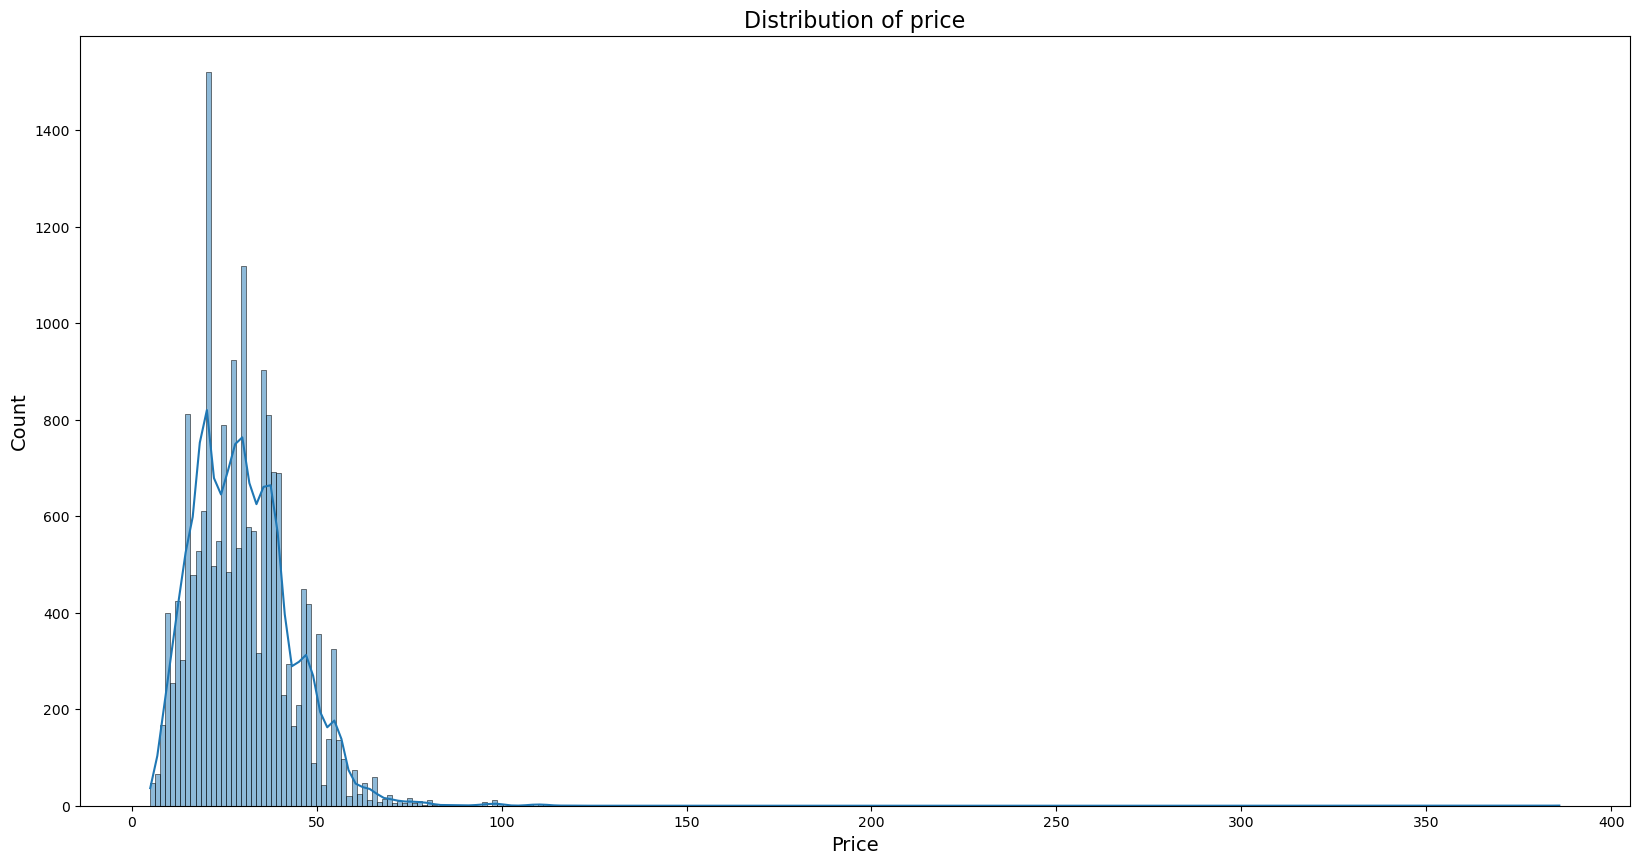

In [135]:
plt.figure(figsize=(20, 10))

sns.histplot(data=df, x='price', kde=True)  
plt.title("Distribution of price", fontsize=16)  
plt.xlabel("Price", fontsize=14) 
plt.ylabel("Count", fontsize=14)

## Brand

In [136]:
df1 = df[df['brand'].map(df['brand'].value_counts()) >= 100]


In [137]:
df1 = df1.reset_index(drop=True)

In [138]:
brand_price = df1.groupby("brand")["price"].mean().reset_index()

<Axes: title={'center': 'Brand Prices'}, xlabel='Brand', ylabel='Price'>

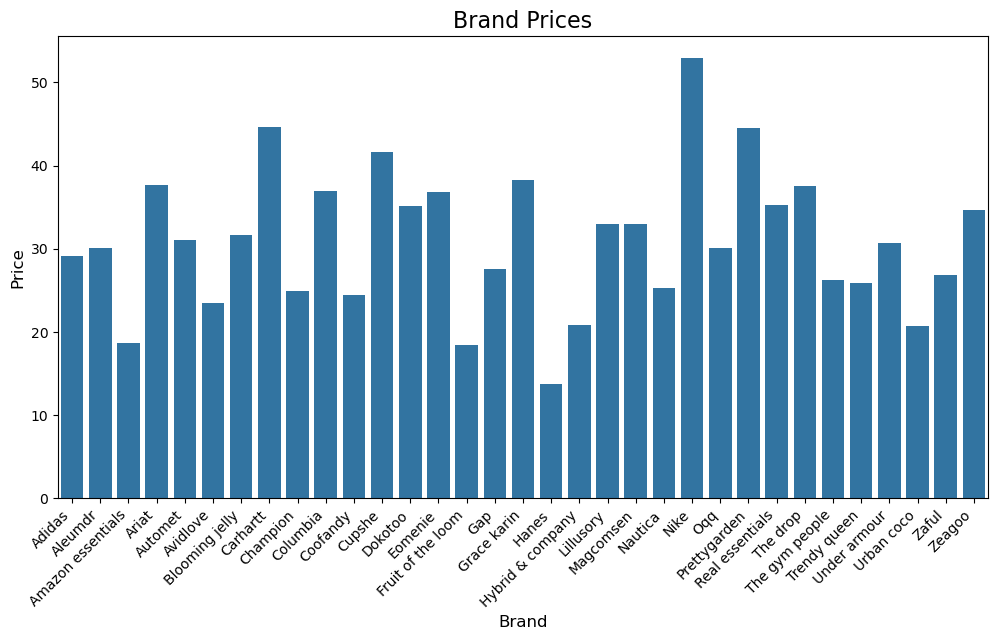

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha="right")

# Add title and axis labels
plt.title("Price of Brands with have more than 100 records ", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)

sns.barplot(data=brand_price, x="brand", y="price")

## Color

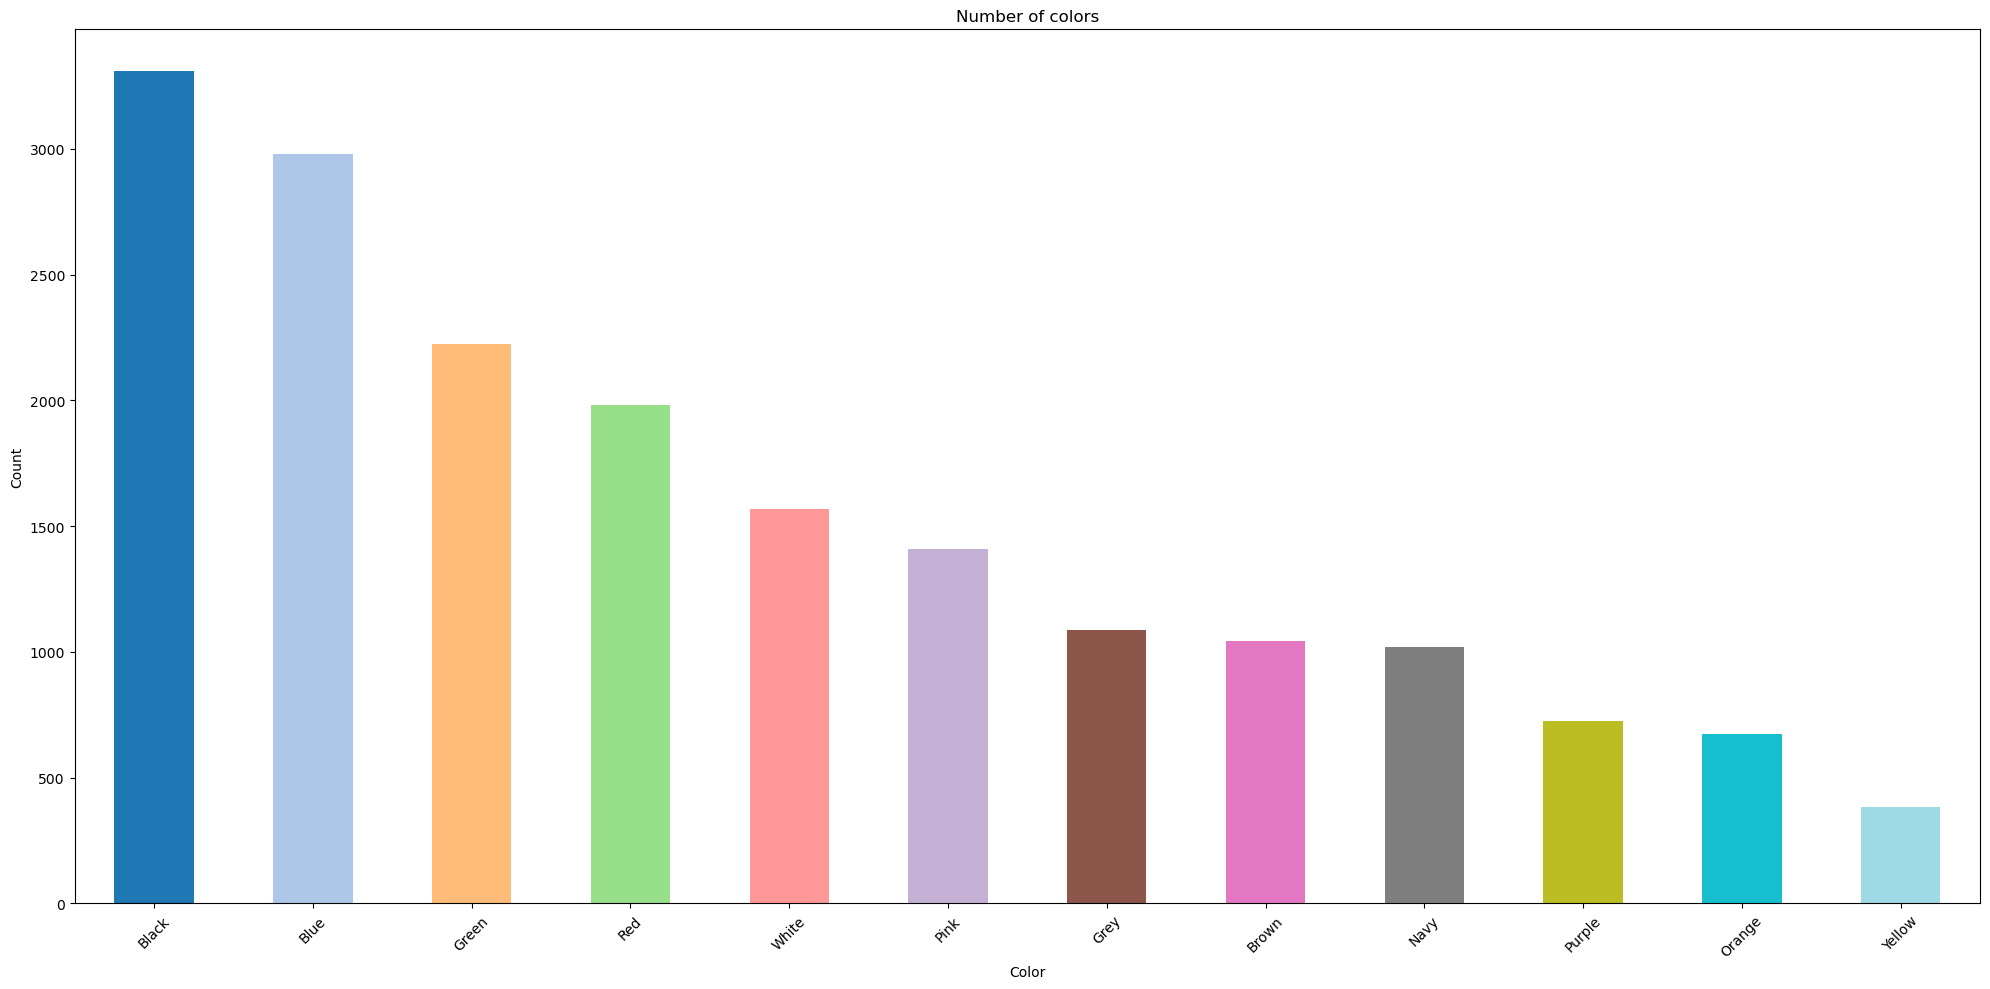

In [141]:
plt.figure(figsize=(20, 10))

color_values = df['color'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(color_values)))
color_values.plot(kind='bar',color=colors, title="Number of colors")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

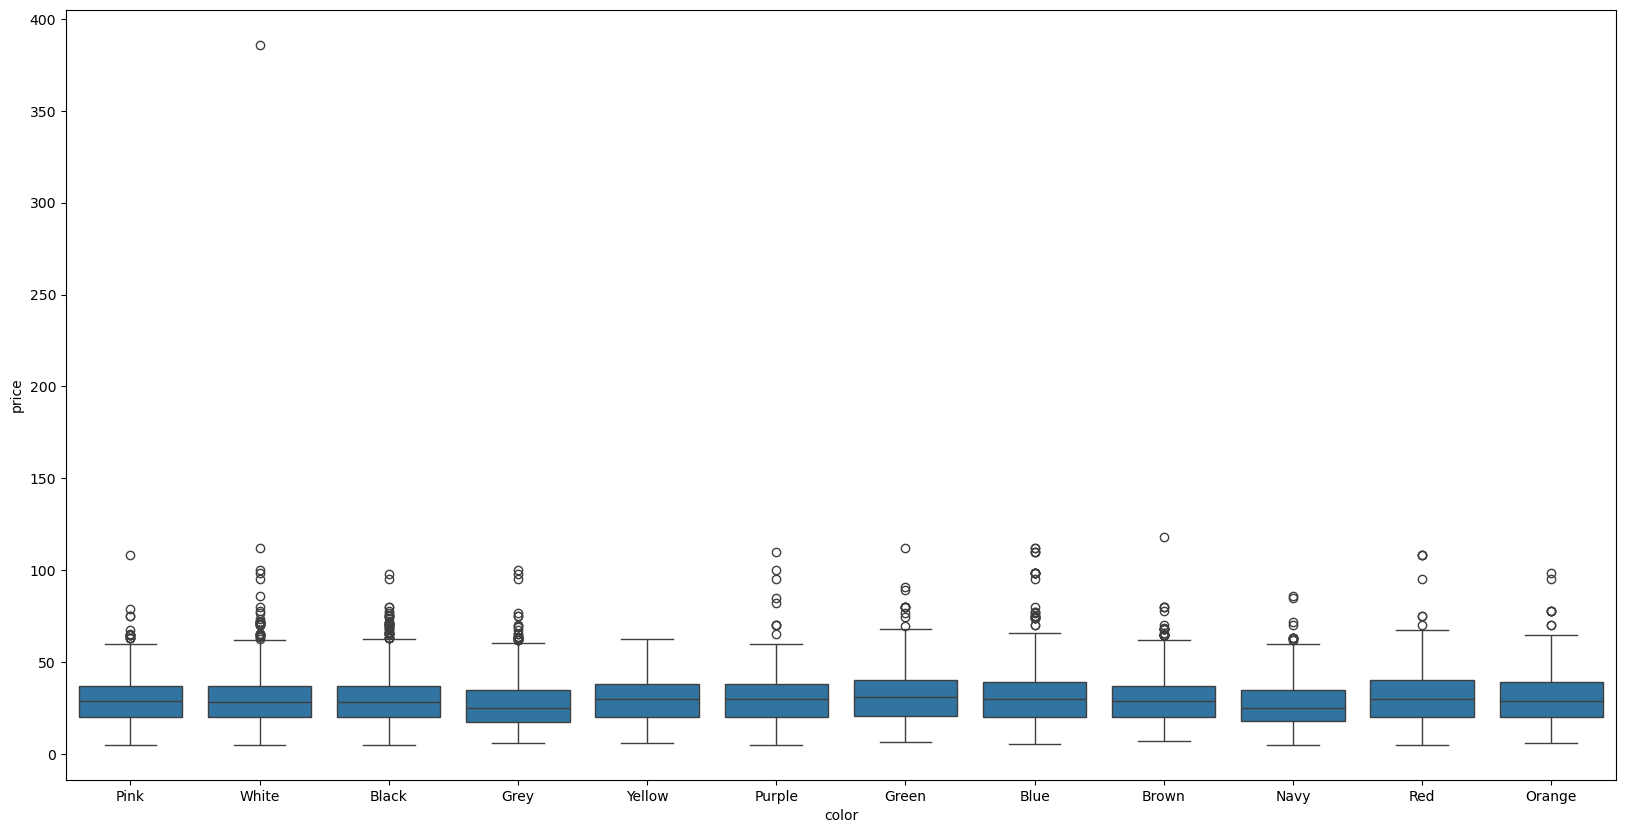

In [142]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x="color", y="price")
plt.show()

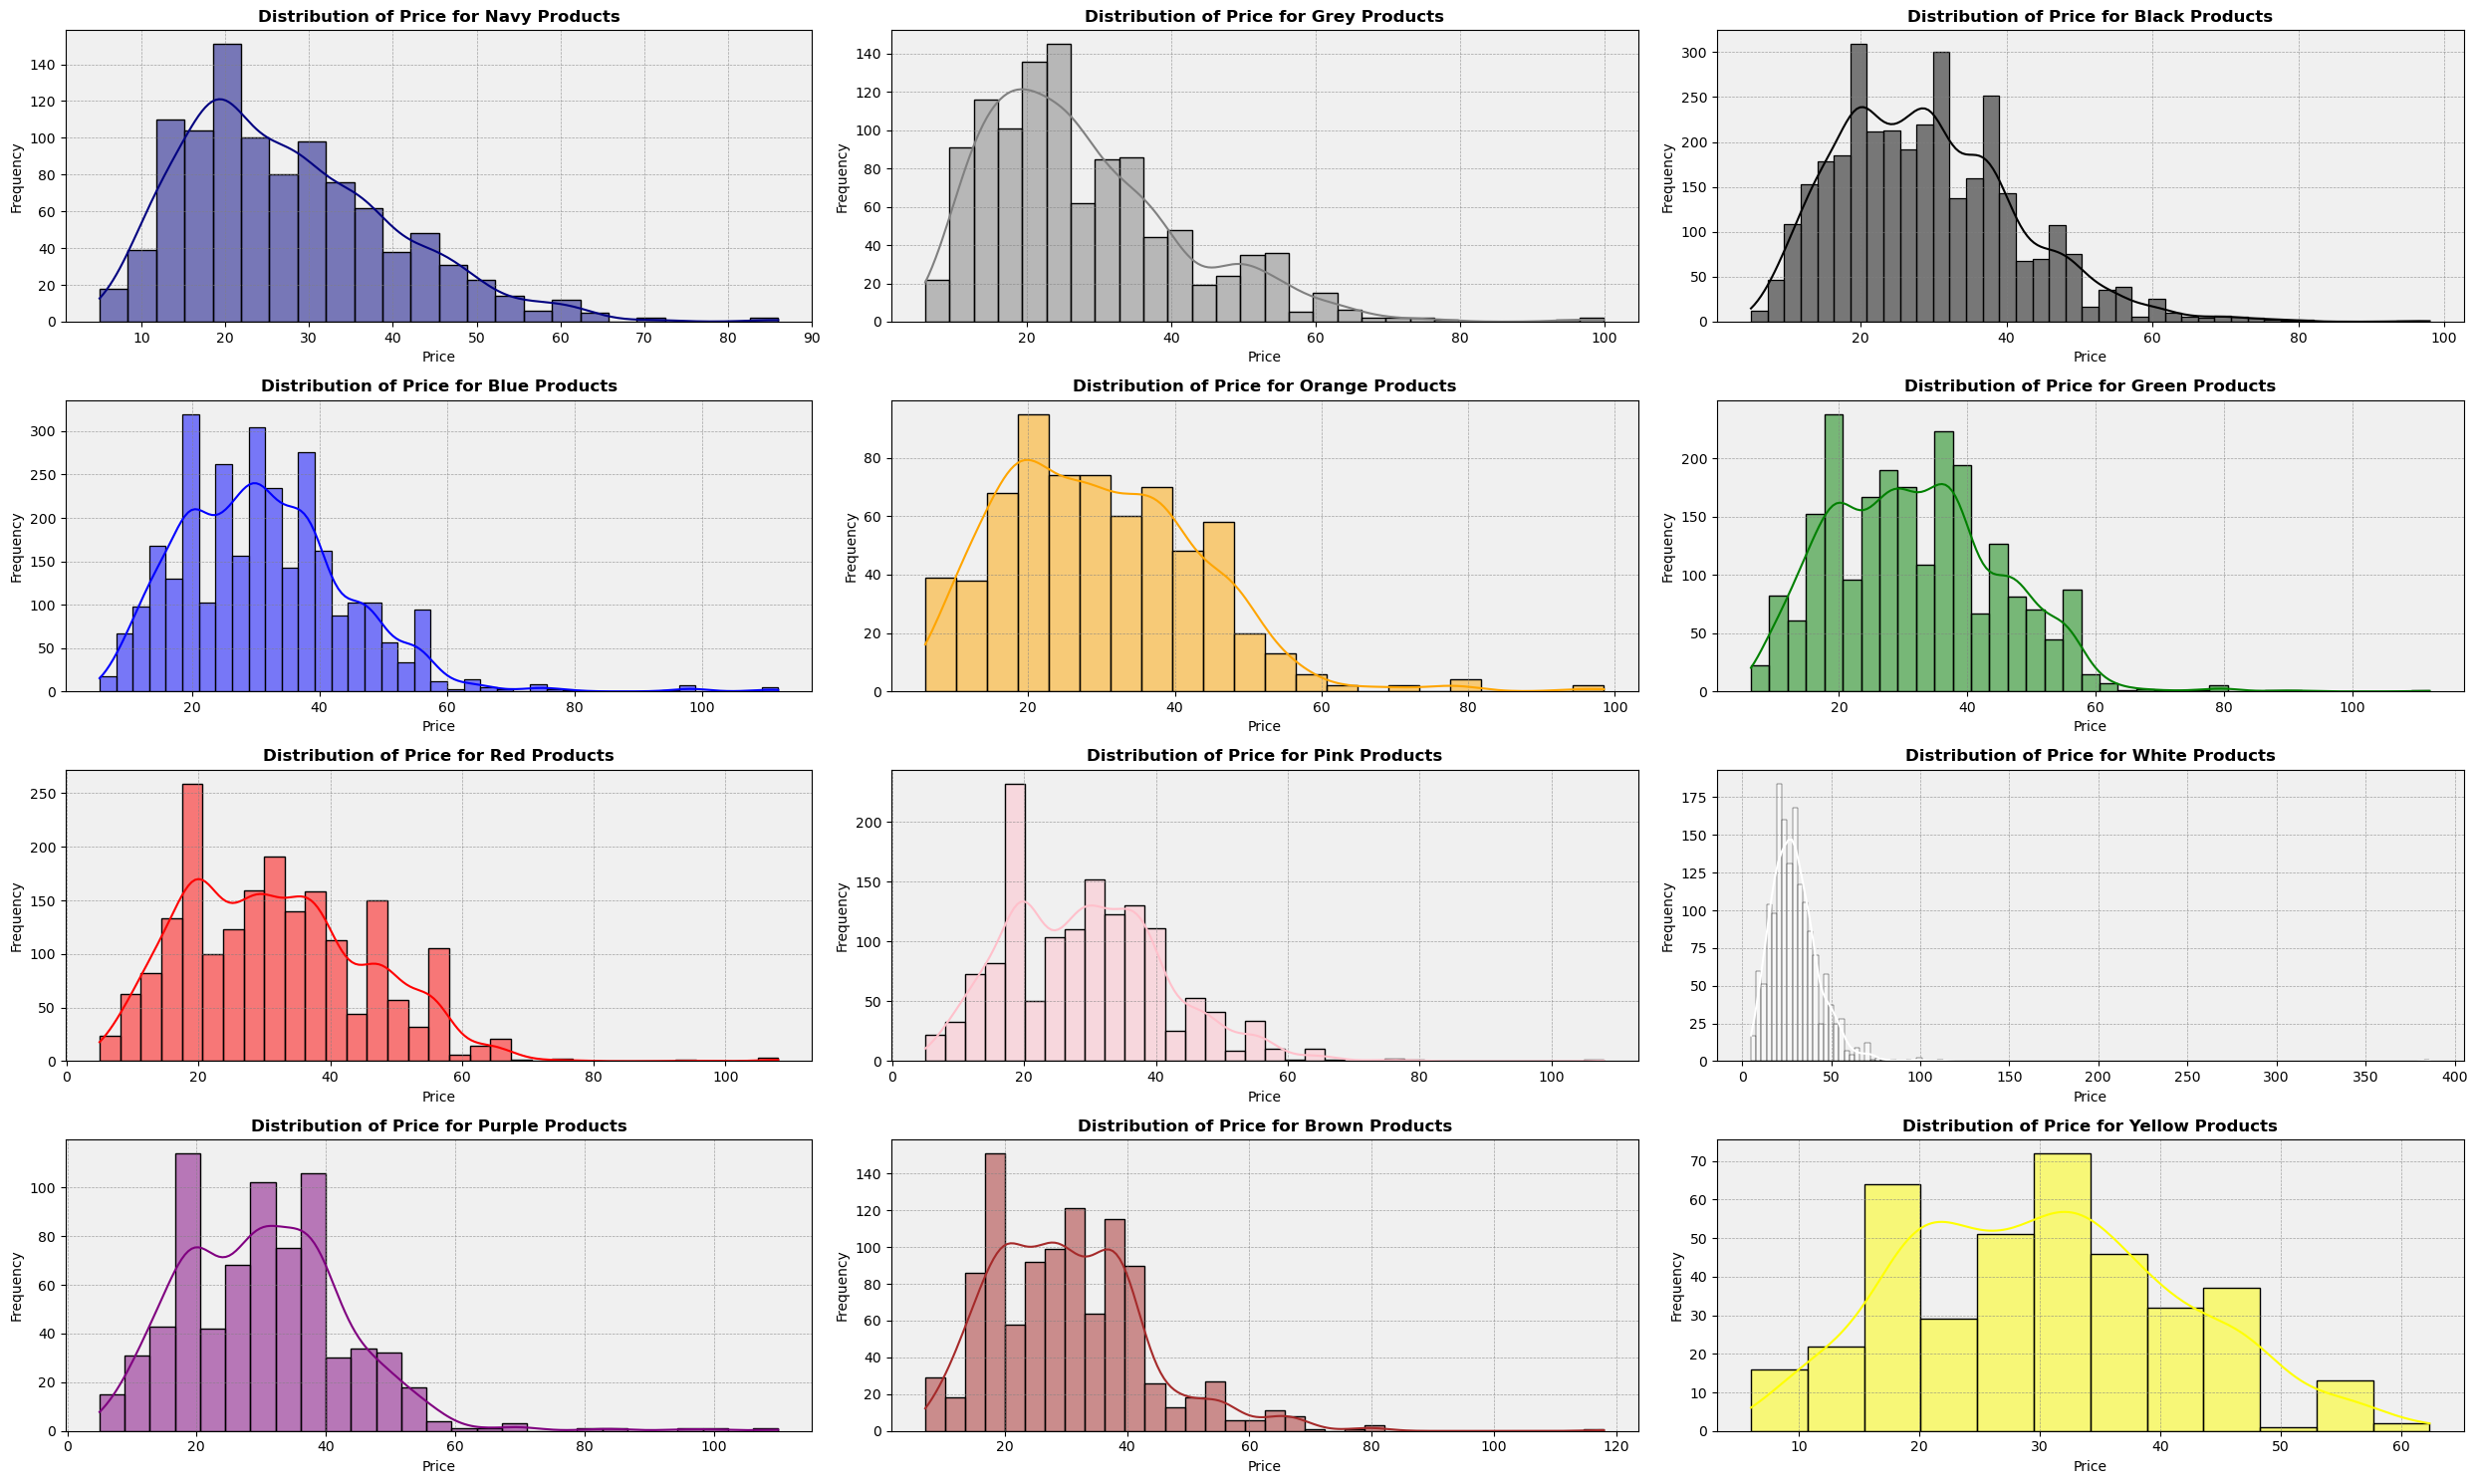

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['Navy', 'Grey', 'Black', 'Blue', 'Orange', 'Green', 
          'Red', 'Pink', 'White', 'Purple', 'Brown', 'Yellow']

fig, axes = plt.subplots(4, 3, figsize=(25, 15))  
axes = axes.flatten()

for i, color in enumerate(colors):
    plot_price_distribution_by_color(df, color, axes[i])  

for j in range(len(colors), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Size

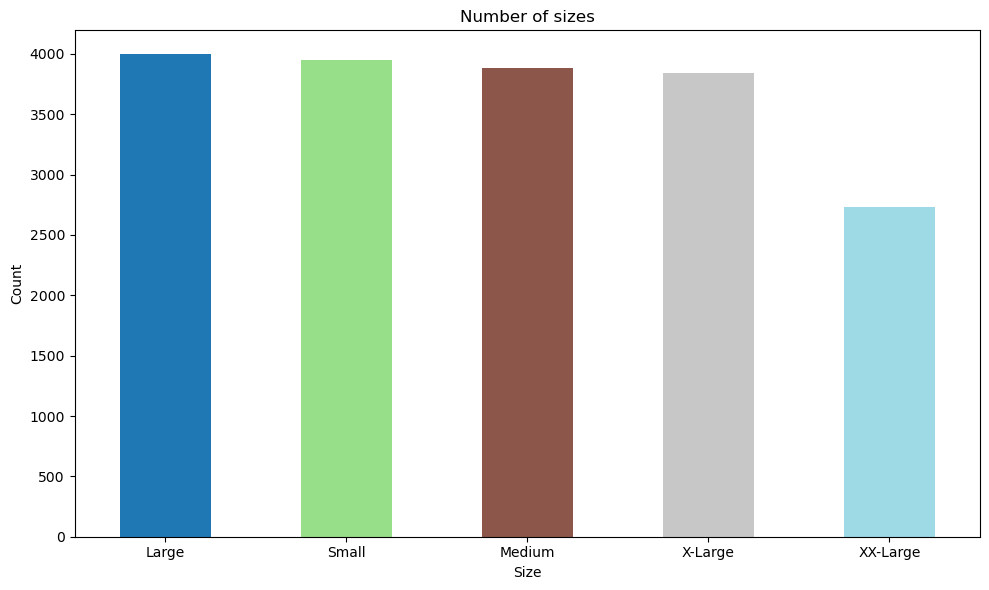

In [144]:
plt.figure(figsize=(10, 6))

size_values = df['size'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(size_values)))
size_values.plot(kind='bar',color=colors, title="Number of sizes")
plt.xlabel("Size")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

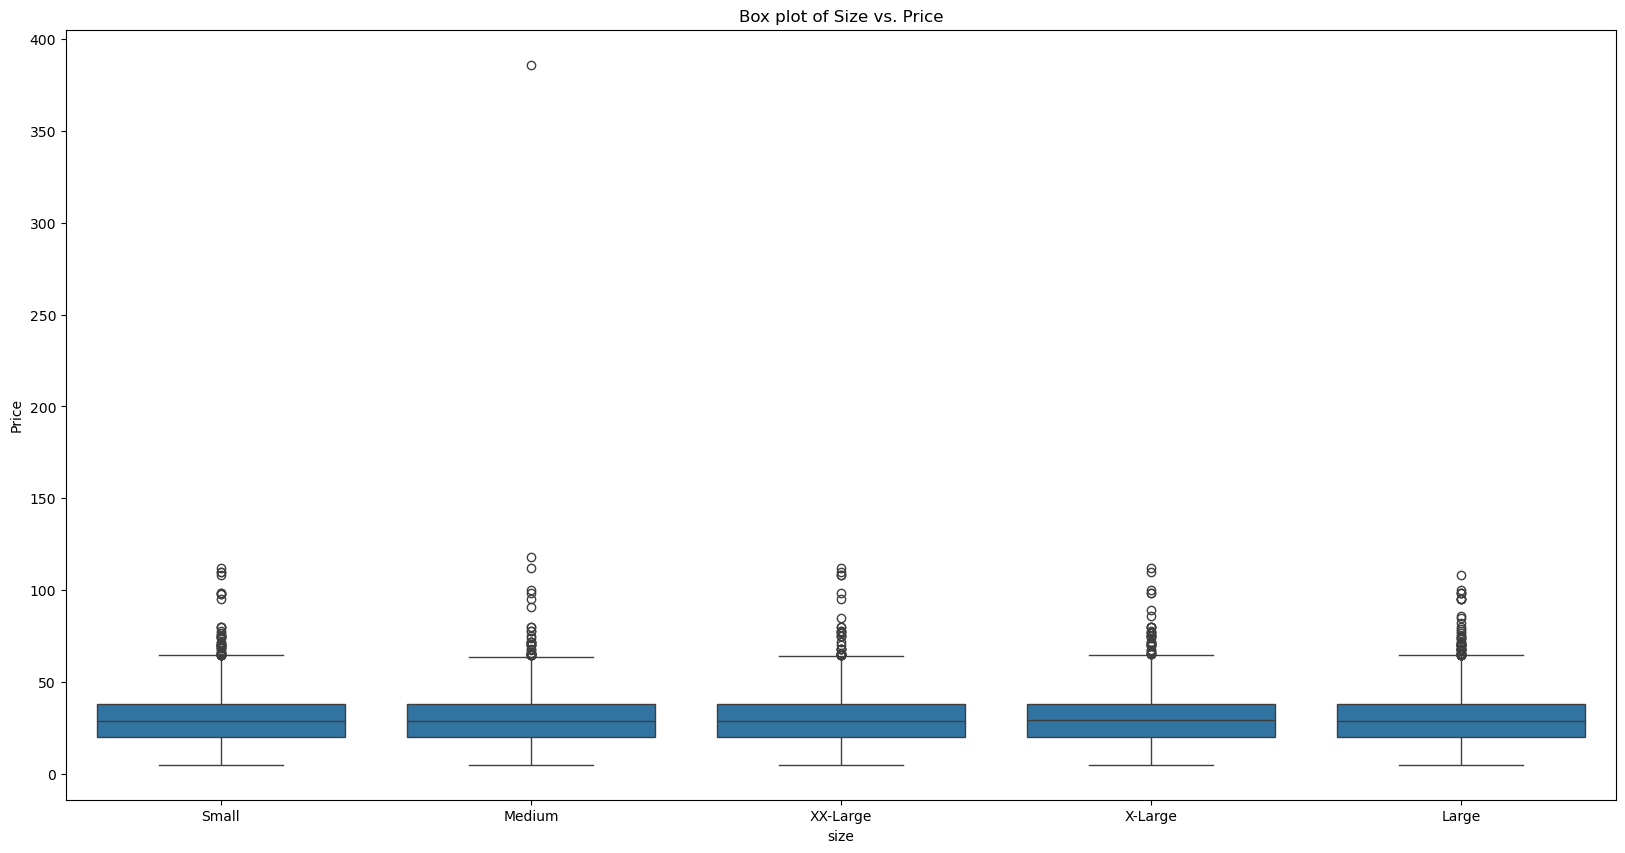

In [145]:
#box plot size
var = 'size'
plt.figure(figsize=(20, 10))

sns.boxplot(x=var, y="price", data=df)
plt.title('Box plot of Size vs. Price')
plt.xlabel(var)
plt.ylabel('Price')

plt.show()

## Department

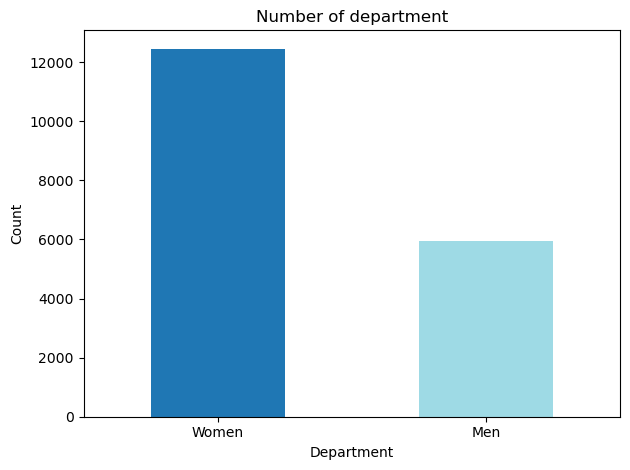

In [146]:
plot_count(df, 'department')

Because of minimal values of Unisex, we should remove it

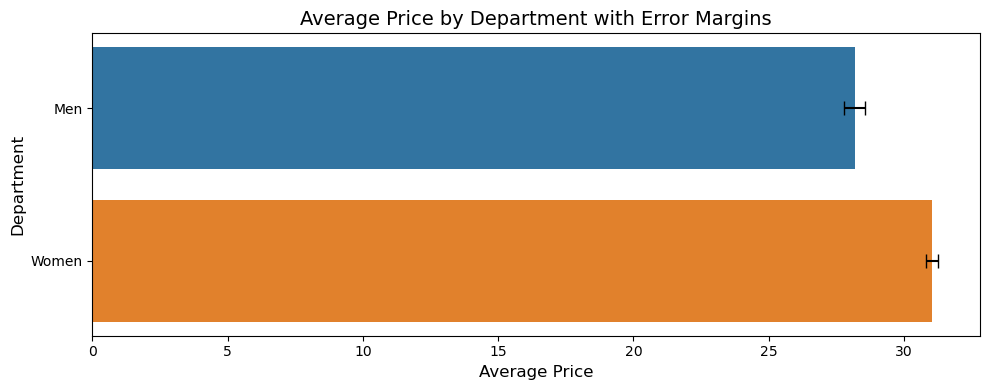

In [147]:
plot_average_price_with_error_bars(df, 'department', figsize=(10, 4))

## Origin

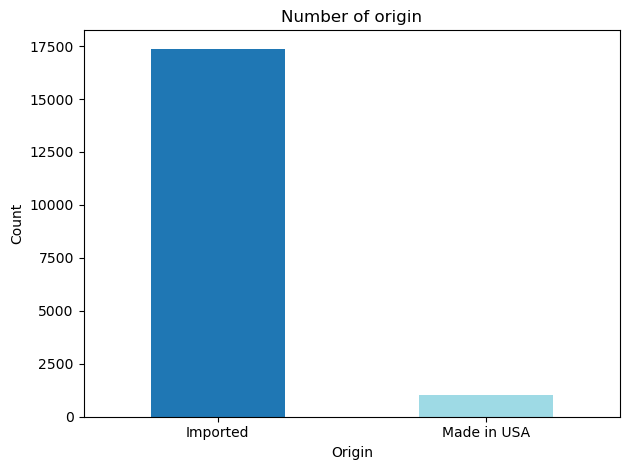

In [148]:
plot_count(df, 'origin')

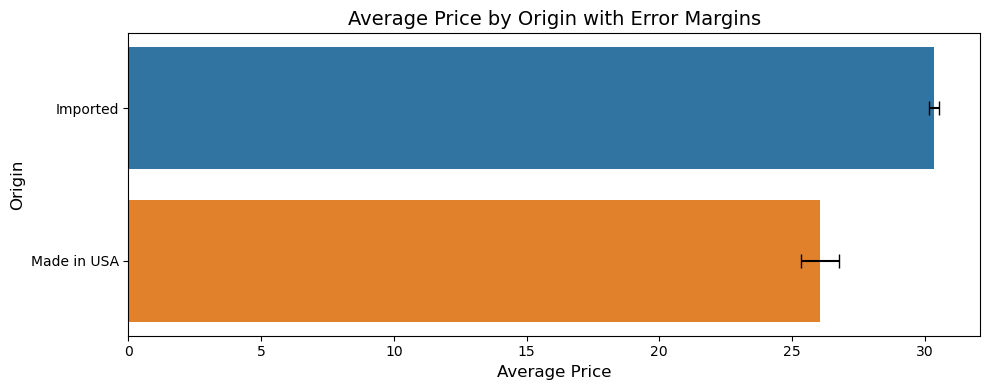

In [149]:
plot_average_price_with_error_bars(df, 'origin', figsize=(10, 4))

## Care

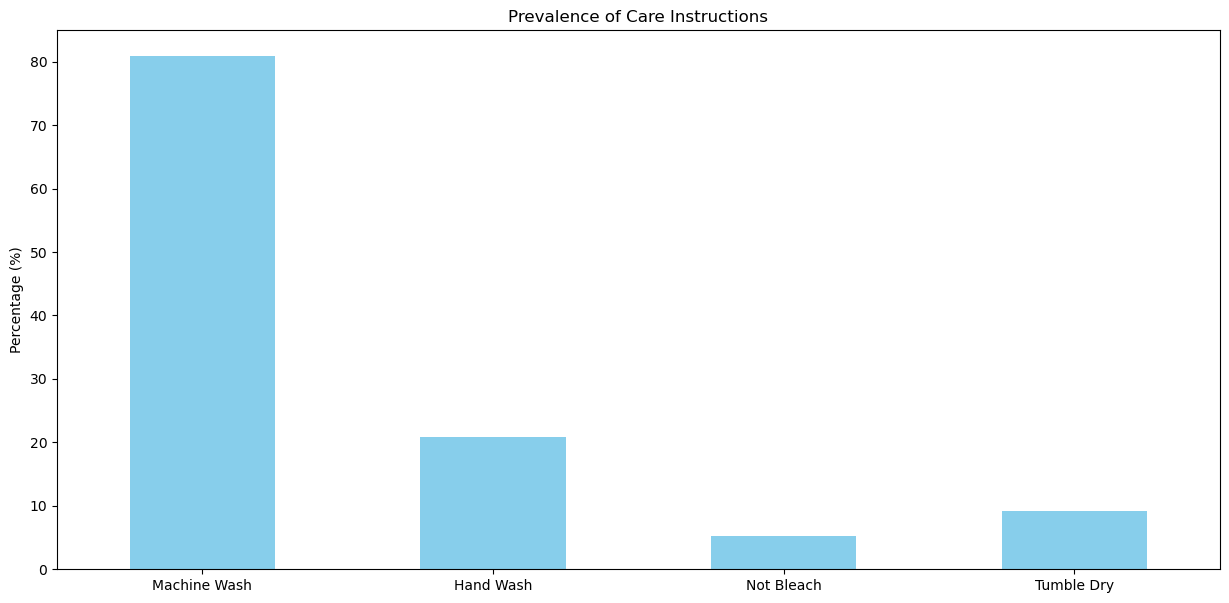

In [150]:
care_features = ['Machine Wash', 'Hand Wash', 'Not Bleach', 'Tumble Dry']
prevalence = df[care_features].mean() * 100  

# Bar plot of feature prevalence
prevalence.plot(kind='bar', figsize=(15, 7), color='skyblue')
plt.title("Prevalence of Care Instructions")
plt.xticks(rotation=0)
plt.ylabel("Percentage (%)")
plt.show()


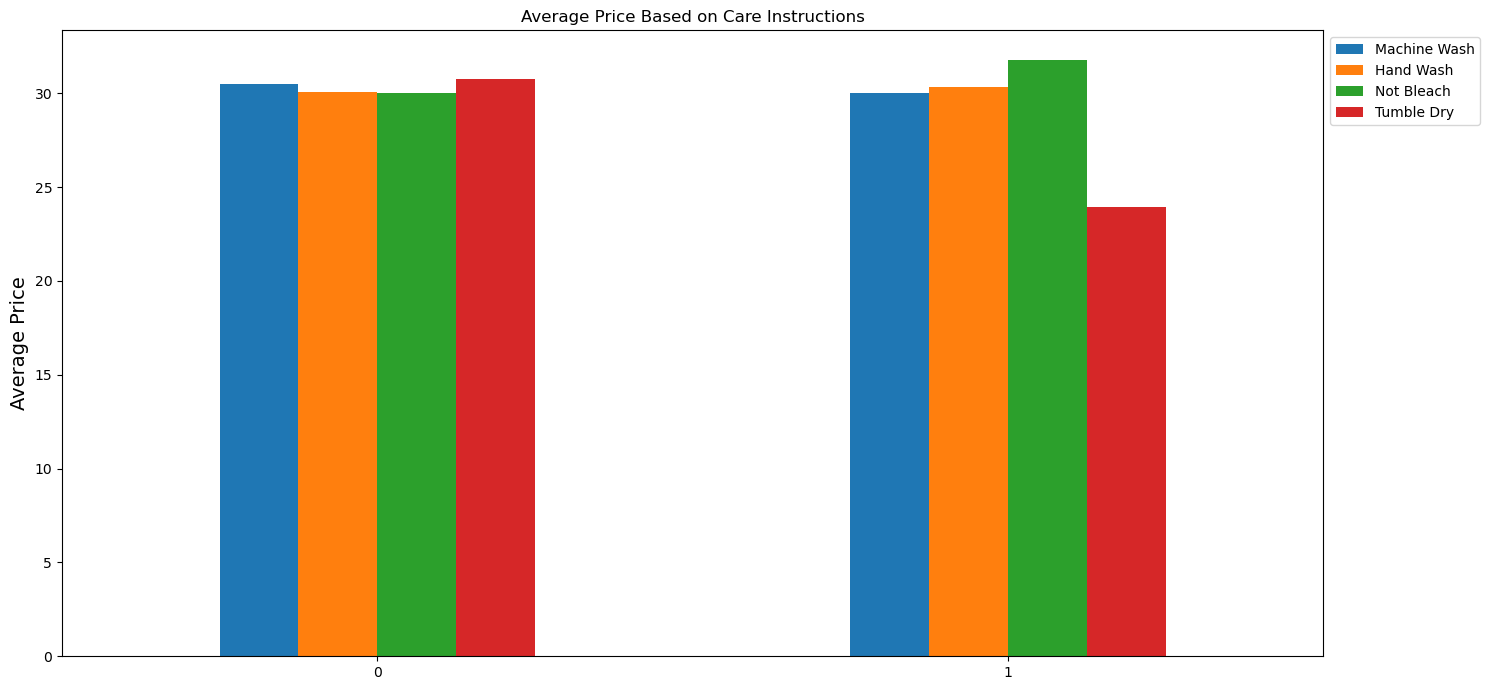

In [151]:
price_relationship = {}
for feature in care_features:
    price_relationship[feature] = df.groupby(feature)['price'].mean()
price_relationship = pd.DataFrame(price_relationship)

# Visualization
price_relationship.plot(kind='bar', figsize=(15, 7))
plt.title("Average Price Based on Care Instructions")
plt.ylabel("Average Price",fontsize=14)
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.tight_layout() 
plt.show()


## Closure

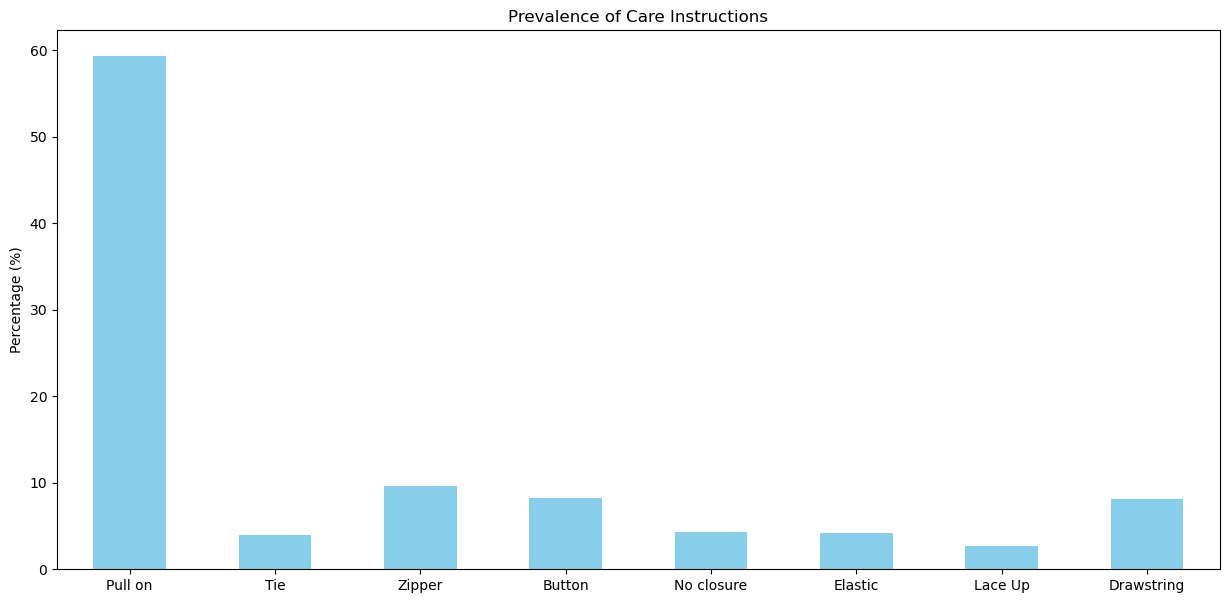

In [152]:
closure_features =['Pull on', 'Tie', 'Zipper', 'Button', 'No closure',
       'Elastic', 'Lace Up', 'Drawstring']

prevalence = df[closure_features].mean() * 100  

# Bar plot of feature prevalence
prevalence.plot(kind='bar', figsize=(15, 7), color='skyblue')
plt.title("Prevalence of Care Instructions")
plt.xticks(rotation=0)
plt.ylabel("Percentage (%)")
plt.show()

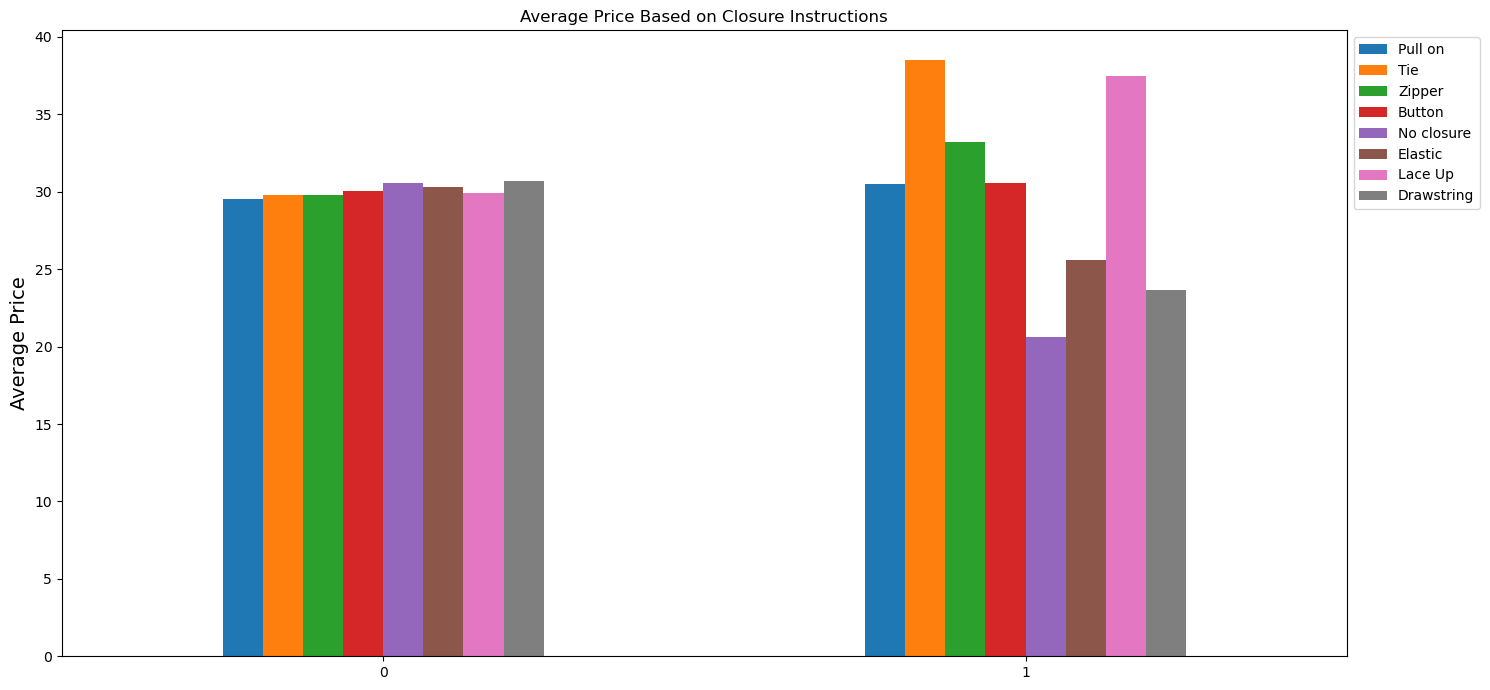

In [153]:
price_relationship = {}
for feature in closure_features:
    price_relationship[feature] = df.groupby(feature)['price'].mean()
price_relationship = pd.DataFrame(price_relationship)

# Visualization
price_relationship.plot(kind='bar', figsize=(15, 7))
plt.title("Average Price Based on Closure Instructions")
plt.ylabel("Average Price",fontsize=14)
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.tight_layout() 
plt.show()

## Fabric

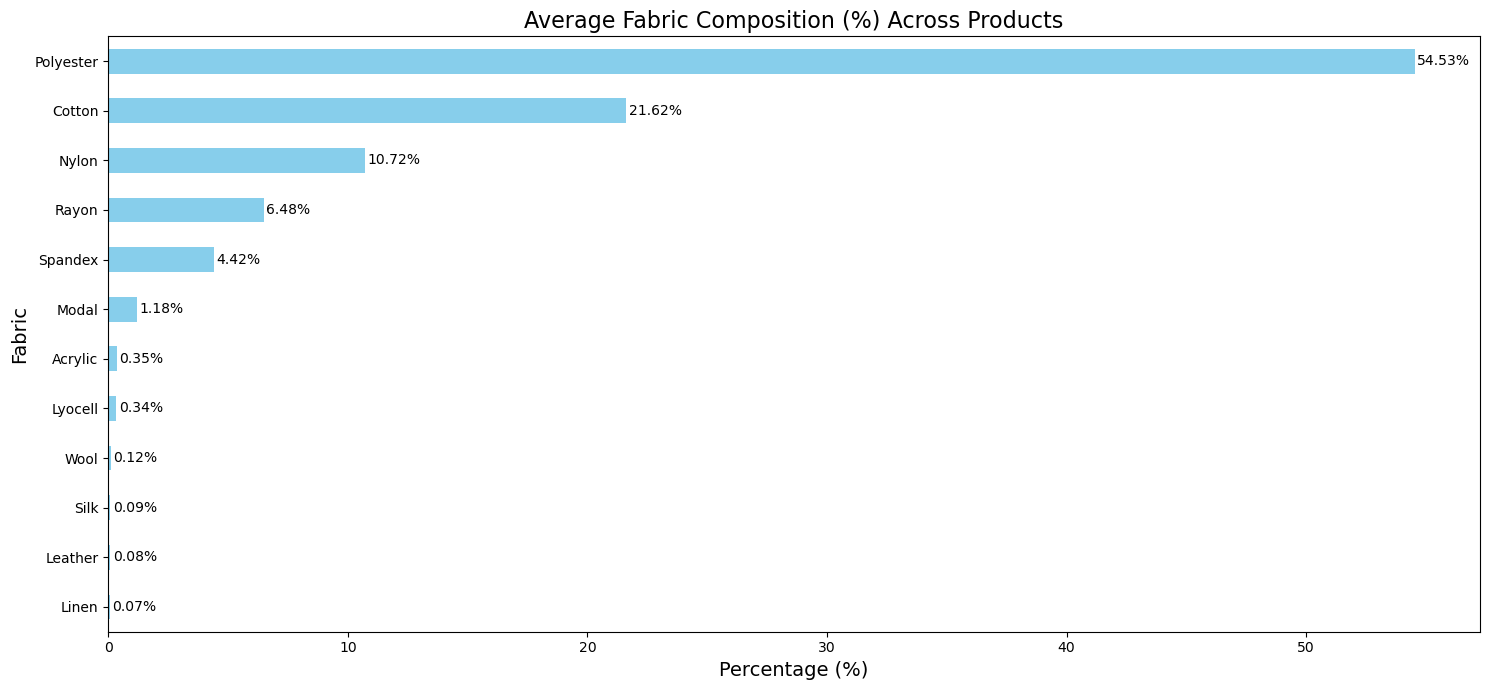

In [154]:
fabric_features = ['Polyester', 'Spandex', 'Nylon', 'Cotton', 'Rayon', 'Acrylic',
                   'Modal', 'Wool', 'Lyocell', 'Leather', 'Linen', 'Silk']

fabric_prevalence = df[fabric_features].mean() * 100  

fabric_prevalence_sorted = fabric_prevalence.sort_values()

plt.figure(figsize=(15, 7))
ax = fabric_prevalence_sorted.plot(kind='barh', color='skyblue')

for i, v in enumerate(fabric_prevalence_sorted):
    ax.text(v + 0.1, i, f'{v:.2f}%', color='black', va='center')

plt.title("Average Fabric Composition (%) Across Products", fontsize=16)
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Fabric", fontsize=14)
plt.tight_layout()

plt.show()


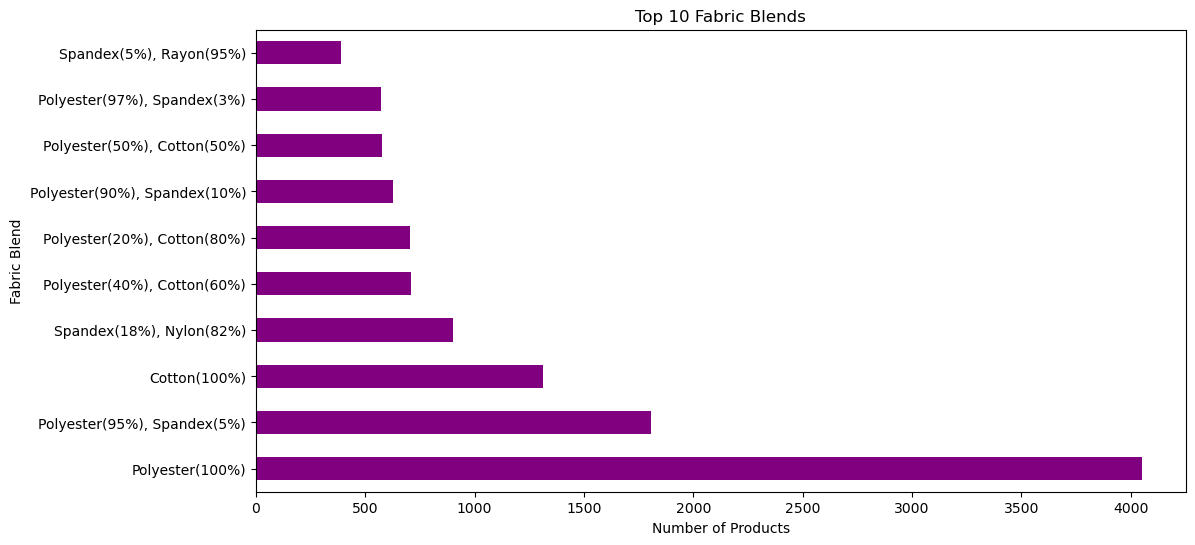

In [155]:
df['fabric_blend'] = df[fabric_features].apply(lambda row: ', '.join([f"{fabric}({int(row[fabric]*100)}%)" for fabric in fabric_features if row[fabric] > 0]), axis=1)
blend_counts = df['fabric_blend'].value_counts()

# Visualize top fabric blends
blend_counts.head(10).plot(kind='barh', figsize=(12, 6), color='purple')
plt.title("Top 10 Fabric Blends")
plt.xlabel("Number of Products")
plt.ylabel("Fabric Blend")
plt.show()


In [162]:
fabric_price = {}
global_min = df[fabric_features].min().min()  
global_max = df[fabric_features].max().max()
bins = np.linspace(global_min, global_max, 5)
fabric_price = {}
for fabric in fabric_features:
    grouped = df.groupby(pd.cut(df[fabric], bins=bins, include_lowest=True), observed=False)['price'].mean()
    fabric_price[fabric] = grouped.reset_index()
result_df = pd.DataFrame()
result_df['bin'] = fabric_price['Polyester']['Polyester']

for fabric, df1 in fabric_price.items():
    result_df[fabric] = df1['price'].values
result_df.set_index('bin', inplace=True)

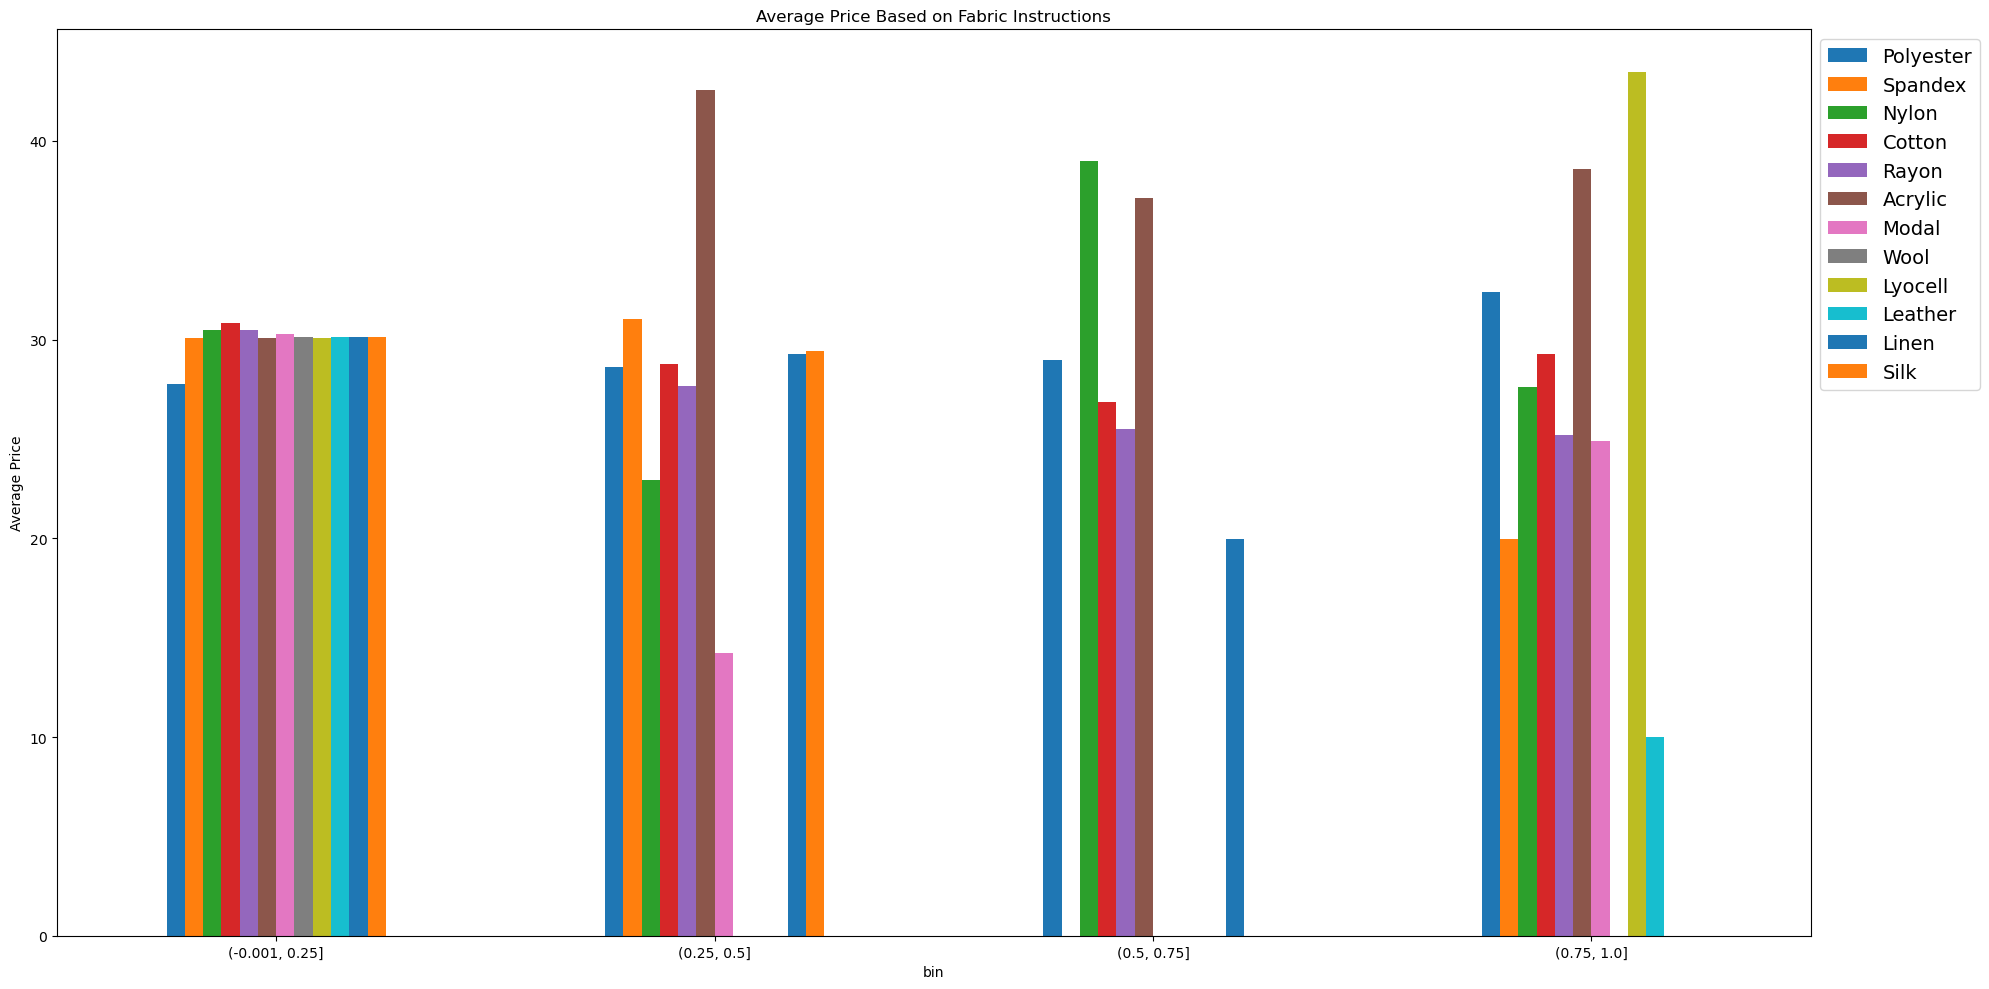

In [164]:
ax = result_df.plot(kind='bar', figsize=(20, 10))
plt.title("Average Price Based on Fabric Instructions")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=14)  
plt.tight_layout() 
plt.show()

In [165]:
df['dominant_fabric'] = df[fabric_features].idxmax(axis=1)

In [166]:
df['dominant_fabric']

0        Polyester
1        Polyester
2        Polyester
3        Polyester
4        Polyester
           ...    
19763    Polyester
19764       Cotton
19765      Lyocell
19766    Polyester
19767    Polyester
Name: dominant_fabric, Length: 18399, dtype: object

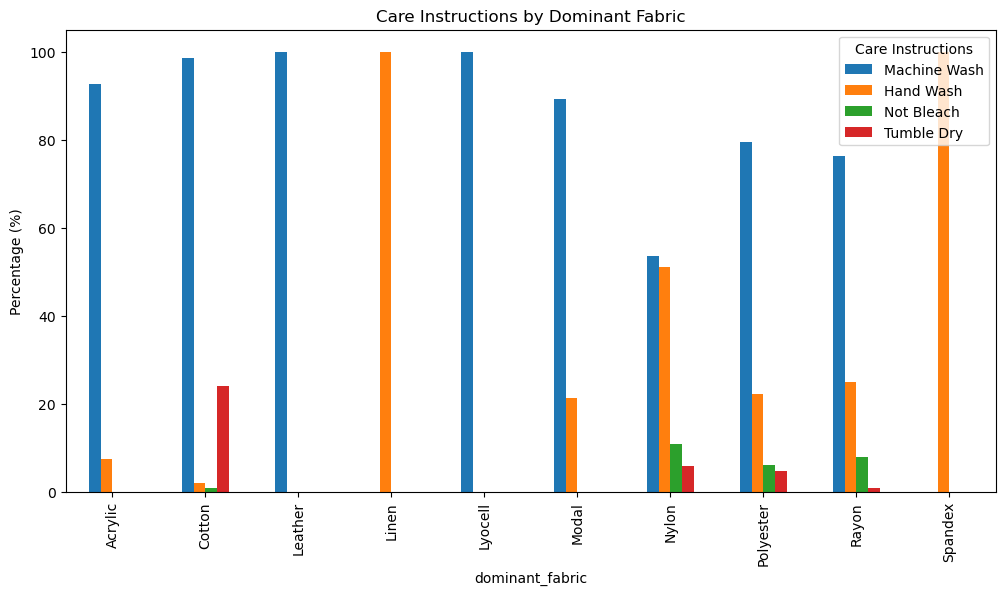

In [168]:
care_features = ['Machine Wash', 'Hand Wash', 'Not Bleach', 'Tumble Dry']

care_fabric_relationship = df.groupby('dominant_fabric')[care_features].mean() * 100
care_fabric_relationship.plot(kind='bar', figsize=(12, 6))
plt.title("Care Instructions by Dominant Fabric")
plt.ylabel("Percentage (%)")
plt.legend(title="Care Instructions")
plt.show()


# Label Encoding

In [169]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['brand'] = encoder.fit_transform(df['brand'])

In [172]:
import joblib
joblib.dump(encoder, 'label_encode/brand_encoder.pkl')

['label_encode/brand_encoder.pkl']

In [174]:
loaded_encoder = joblib.load('label_encode/brand_encoder.pkl')

In [180]:
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
df['color'] = encoder1.fit_transform(df['color'])

In [ ]:
sex_map = {'Women':1, 'Men':2}
df['department'] = df['department'].map(sex_map)

C:\Users\eroma\AppData\Local\Temp\ipykernel_15756\1962357166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = df['department'].map(sex_map)


In [ ]:
origin_map = {'Imported':0,'Made in USA':1}
df['origin'] = df['origin'].map(origin_map)

C:\Users\eroma\AppData\Local\Temp\ipykernel_15756\276043696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['origin'] = df['origin'].map(origin_map)


In [ ]:
df.to_json('preprocess_data.json',index=False)